# Dispersion formula by Python code

In [2]:
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [11]:
nedata = pd.read_csv('data-e.csv')
nodata = pd.read_csv('data-o.csv')

In [12]:
xe = nedata.wvl
ye = nedata.nex
xo = nodata.wvl
yo = nodata.no

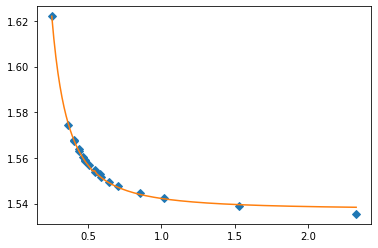

fitted parameters: [4.09733852e-06 1.36395407e+00 3.39664709e-05 2.64929493e-02
 1.05366957e-02 2.92804677e-01]


In [13]:
def Sellmeier(wl1, b1, b2, b3, c1, c2, c3):
    return (1+b1/(1-c1/wl1**2)+b2/(1-c2/wl1**2)+b3/(1-c3/wl1**2))**.5


# some initial parameter values - must be within bounds
initialParameters = numpy.array([.01, .01, .01, .01, .01,.01])

# bounds on parameters - initial parameters must be within these
lowerBounds = (1e-8, 1e-8, 1e-8, 1e-8, 1e-8, 1e-8)
upperBounds = (1e10, 1e10, 1e10 , 1e10, 1e10, 1e10)
#parameterBounds = [lowerBounds, upperBounds]

efittedParameters, pcov = curve_fit(Sellmeier, xe, ye, initialParameters, bounds = (lowerBounds,upperBounds ))

# values for display of fitted function
eb1,eb2,eb3,ec1,ec2,ec3 = efittedParameters

# for plotting the fitting results
xePlotData = numpy.linspace(min(xe), max(xe), 150)
ye_plot = Sellmeier(xePlotData, eb1,eb2,eb3,ec1,ec2,ec3)

plt.plot(xe, ye, 'D') # plot the raw data as a scatterplot
plt.plot(xePlotData, ye_plot) # plot the equation using the fitted parameters
plt.show()

print('fitted parameters:', efittedParameters)

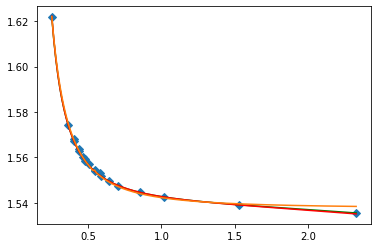

In [15]:
ne2018_eq = (1+1.151075/(1-0.007142/xePlotData**2)+0.21803/(1-0.02259/xePlotData**2)+0.656/(1-263/xePlotData**2))**.5
no2018_eq = (1+0.90291/(1-0.003926/xePlotData**2)+0.83155/(1-0.018786/xePlotData**2)+0.76536/(1-60.01/xePlotData**2))**.5

ne2012_eq = (2.3698703+0.0128445/(xePlotData**2-0.0153064)-0.0029129*xePlotData**2)**.5
no2012_eq = (2.7366122+0.0185720/(xePlotData**2-0.0178746)-0.0143756*xePlotData**2)**.5

plt.plot(xe, ye, 'D') # plot the raw data as a scatterplot
plt.plot(xePlotData,ne2018_eq,'g')
plt.plot(xePlotData,ne2012_eq,'r')
plt.plot(xePlotData, ye_plot) # plot the equation using the fitted parameters
plt.show()